### Rotational mass in Nordic system

#### Have a look at Nordic energy mix

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import *
from cycler import cycler

CASE = "Base"

df_gen = pd.read_csv(f'Results/{CASE}/results_output_gen.csv')
df_nordic_gen = df_gen[df_gen["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_nordic_gen

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
0,Denmark,Coalexisting,2020-2025,0.000000,3165.000000,0.539882,0.000000,14968.431964
1,Denmark,Coalexisting,2025-2030,0.000000,1947.692308,0.607831,0.000000,10370.682127
2,Denmark,Coalexisting,2030-2035,0.000000,1308.605769,0.406889,0.000000,4664.328623
3,Denmark,Coalexisting,2035-2040,0.000000,912.980769,0.044419,0.000000,355.249210
4,Denmark,Coalexisting,2040-2045,0.000000,633.000000,0.000169,0.000000,0.939091
...,...,...,...,...,...,...,...,...
1115,NO5,Nuclear,2035-2040,0.000228,0.000358,0.555350,701.941874,0.001740
1116,NO5,Nuclear,2040-2045,0.000054,0.000412,0.440100,113.923257,0.001589
1117,NO5,Nuclear,2045-2050,0.000581,0.000993,0.381954,794.308304,0.003322
1118,NO5,Nuclear,2050-2055,0.000003,0.000995,0.504069,1.980385,0.004395


Nordic (NO, SE, DK & FI) generation by source for case: Base
['Windonshore', 'Hydroregulated', 'Hydrorun-of-the-river', 'Nuclear', 'Bio', 'Windoffshoregrounded', 'GasOCGT', 'GasCCGT', 'Waste', 'Wave', 'Solar', 'Coal', 'Oilexisting', 'Bioexisting', 'Gasexisting', 'GasCCSadv', 'GasCCS', 'Coalexisting']


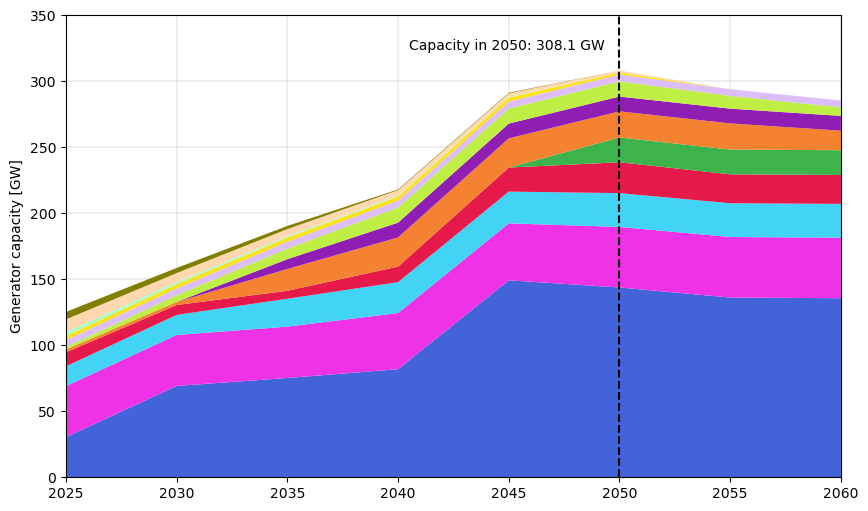

In [7]:
def plot_gen_by_source(case, _df):
    print(f"Nordic (NO, SE, DK & FI) generation by source for case: {case}")

    df_gen_source = _df.copy()
    df_gen_source["genInstalledCap_MW"] = df_gen_source.groupby(['GeneratorType', 'Period'])['genInstalledCap_MW'].transform('sum')
    df_gen_source = df_gen_source.drop_duplicates(("GeneratorType", "Period"), ignore_index=True)[["GeneratorType", "Period", "genInstalledCap_MW"]]

    periods = list(df_gen_source["Period"].unique())

    gen_source_sorted_by_cap = list(df_gen_source[df_gen_source["Period"] == "2055-2060"]\
                              .sort_values(by="genInstalledCap_MW", ascending=False)["GeneratorType"].values)
    
    gen_source_displayed = gen_source_sorted_by_cap

    installed_caps_gen = []
    for gen_source in gen_source_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df_gen_source[(df_gen_source["GeneratorType"] == gen_source) & (df_gen_source["Period"] == period)]["genInstalledCap_MW"].values[0])

        # Remove gen_source that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            gen_source_displayed.remove(gen_source)
        else:
            installed_caps_gen.append(cap_by_period)

    installed_caps_gen_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps_gen]
    period_displayed_gen = [period.split("-")[1] for period in periods]

    print(gen_source_displayed)

    plt.rcParams.update({'font.size': 10})
    default_cycler = cycler(color=[TECH_TO_COLOR[tech] for tech in gen_source_displayed])
    plt.figure(figsize=(10,6))
    plt.rc('axes', axisbelow=True, prop_cycle=default_cycler)
    plt.grid(lw=0.3)
    plt.stackplot(period_displayed_gen, installed_caps_gen_GW, labels=gen_source_displayed)
    plt.ylabel('Generator capacity [GW]')
    #plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
    plt.margins(x=0)

    y_max = 350
    plt.ylim(0, y_max)
    
    # Plot capacity 2050 
    cap_2050 = sum([cap[5] for cap in installed_caps_gen_GW]) # Total trans cap in GW

    # Align text based on height of peak
    # prod_by_periods = [sum([gen_cap[i] for gen_cap in installed_caps_gen_GW]) for i in range(8)]
    # max_prod = max(prod_by_periods)

    plt.axvline(x = 5, color = 'black', ls="--")
    plt.text(x=3.1, y=y_max*0.95, s=f"Capacity in 2050: {round(cap_2050, 1)} GW", verticalalignment='top')
    plt.savefig(f"SavedFigs/RotationalMass/Nordic-EnergyMix", bbox_inches='tight')
    plt.show()

plot_gen_by_source(CASE, df_nordic_gen)

Operational data set to calculate rotational mass

In [8]:
df_rotm = pd.read_csv(f"Results/{CASE}/results_output_Operational.csv")
df_rotm

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,scenario1,winter,1,6538.649326,-9934.890034,-6.538649e+03,0.0,0.0,...,-0.000189,0.000354,62352.000331,-0.000023,-2326.759659,5900.000209,-177.000006,3.546131e-08,58.949191,0.022063
1,Austria,2020-2025,scenario1,winter,2,6556.416255,-9839.652657,-6.556416e+03,0.0,0.0,...,-0.000166,242.968806,62109.031671,-0.000020,-624.315879,3777.921279,-113.337638,3.546220e-08,60.772369,0.022004
2,Austria,2020-2025,scenario1,winter,3,7885.187872,-9938.130187,-7.885188e+03,0.0,0.0,...,-0.000182,1842.026319,60267.005512,-0.000022,-513.451380,746.770679,-22.403120,3.546064e-08,60.772370,0.018296
3,Austria,2020-2025,scenario1,winter,4,8049.605513,-10509.670167,-8.049606e+03,0.0,0.0,...,-0.000187,2693.490958,57573.514718,-0.000023,-574.331303,351.448645,-10.543459,3.545940e-08,60.772371,0.017922
4,Austria,2020-2025,scenario1,winter,5,8099.702591,-10797.928132,-8.099703e+03,0.0,0.0,...,-0.000188,2959.416057,54614.098826,-0.000023,-515.496862,262.171684,-7.865151,3.545815e-08,60.772371,0.017811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192315,EnergyhubCentral,2055-2060,scenario3,peak2,716,0.000000,-0.000000,-2.021074e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30648.851783,31596.754415,-947.902632,0.000000e+00,31.938947,0.000000
1192316,EnergyhubCentral,2055-2060,scenario3,peak2,717,0.000000,-0.000000,-2.027581e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30648.851783,31596.754415,-947.902632,0.000000e+00,31.938947,0.000000
1192317,EnergyhubCentral,2055-2060,scenario3,peak2,718,0.000000,-0.000000,-1.879019e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30648.851783,31596.754415,-947.902632,0.000000e+00,31.938947,0.000000
1192318,EnergyhubCentral,2055-2060,scenario3,peak2,719,0.000000,-0.000000,-2.090207e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30648.851783,31596.754415,-947.902632,0.000000e+00,31.938948,0.000000


Calculate mean values of scenarios 

In [9]:
df_rotm = df_rotm.groupby(["Node", "Period", "Hour"]).mean(numeric_only=True).reset_index()
df_rotm

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,1,6772.027295,-9483.377179,-6772.027295,0.0,0.0,0.0,112.499962,...,-0.000178,0.000500,62352.000174,-0.000022,-1746.381711,4595.599250,-137.867977,3.544925e-08,51.597109,0.075337
1,Austria,2020-2025,2,6691.195119,-9250.773997,-6691.195118,0.0,0.0,0.0,112.499761,...,-264.630970,80.989785,62482.715182,-52.926176,-1186.803994,4051.571193,-121.547136,3.544565e-08,50.379479,0.076590
2,Austria,2020-2025,3,7158.032353,-9552.050437,-7158.032353,0.0,0.0,0.0,112.499762,...,-261.152836,614.008960,62077.628508,-52.230550,-1108.105581,3246.667569,-97.400027,3.544385e-08,50.379480,0.074539
3,Austria,2020-2025,4,7118.228427,-9607.756654,-7118.228427,0.0,0.0,0.0,112.499762,...,-678.160081,897.830511,61722.326079,-135.631999,-703.478498,3065.295148,-91.958854,3.544236e-08,50.379480,0.075398
4,Austria,2020-2025,5,6994.326314,-9701.184300,-6994.326314,0.0,0.0,0.0,112.499762,...,-468.678630,986.472214,61110.796786,-93.735709,-562.882252,2837.058406,-85.111752,3.544117e-08,50.379480,0.077240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397435,VestavindF,2055-2060,716,0.006384,0.000000,-0.006384,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.095094,0.091451,-0.002744,2.850213e-06,383.268510,0.000000
397436,VestavindF,2055-2060,717,0.006817,0.000000,-0.006817,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.096776,0.092738,-0.002782,2.849998e-06,383.120330,0.000000
397437,VestavindF,2055-2060,718,0.007078,0.000000,-0.007078,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.095703,0.091363,-0.002741,2.851156e-06,384.006382,0.000000
397438,VestavindF,2055-2060,719,0.007497,0.000000,-0.007497,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.091357,0.086450,-0.002594,2.848995e-06,383.992394,0.000000


Filter by Nordic markets

In [10]:
df_rotm = df_rotm[df_rotm["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_rotm

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Denmark,2020-2025,1,4908.874031,-5816.958454,-4908.874031,0.0,0.0,0.0,2146.106599,...,-0.000152,0.000235,0.000428,-0.000015,-1743.580071,2733.674650,-82.010240,3.542399e-08,39.633684,0.497868
1,Denmark,2020-2025,2,4345.067002,-5688.709421,-4345.067002,0.0,0.0,0.0,1582.499889,...,-0.000209,0.000165,0.000451,-0.000021,-1209.882403,2632.499863,-78.974996,3.541001e-08,37.562859,0.409584
2,Denmark,2020-2025,3,4246.267347,-5743.498792,-4246.267347,0.0,0.0,0.0,1582.484897,...,-0.000213,0.000163,0.000480,-0.000021,-1205.038758,2785.845621,-83.575369,3.540876e-08,37.305303,0.410170
3,Denmark,2020-2025,4,4114.278230,-5678.394031,-4114.278230,0.0,0.0,0.0,1582.483590,...,-0.000213,0.000163,0.000509,-0.000021,-1198.882053,2848.451448,-85.453543,3.540816e-08,37.305301,0.410313
4,Denmark,2020-2025,5,4162.315049,-5568.497960,-4162.315049,0.0,0.0,0.0,1582.499894,...,-0.000206,0.000165,0.000529,-0.000021,-1156.403268,2641.841464,-79.255244,3.540802e-08,37.558422,0.387097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46075,Sweden,2055-2060,716,28694.337371,-31781.332665,-28694.337370,0.0,0.0,0.0,0.000000,...,-76.374427,0.002551,983.553843,-15.274530,-3864.431869,7245.153646,-217.354609,2.846499e-06,375.985064,0.041821
46076,Sweden,2055-2060,717,28599.165805,-31707.395078,-28599.165804,0.0,0.0,0.0,0.000000,...,-76.317862,0.005801,1044.602627,-15.263277,-3815.658413,7216.700769,-216.501023,2.846648e-06,377.023318,0.041892
46077,Sweden,2055-2060,718,29170.106883,-31878.338780,-29170.106883,0.0,0.0,0.0,0.000000,...,-45.514310,0.005713,1081.008572,-9.102653,-3840.130875,6797.805533,-203.934166,2.857585e-06,385.473124,0.041322
46078,Sweden,2055-2060,719,30951.230107,-32666.217714,-30951.230107,0.0,0.0,0.0,0.000000,...,-12.340189,0.005869,1090.875068,-2.467824,-4408.726301,6325.822913,-189.774687,2.857530e-06,385.541618,0.038036


Sum by rotational mass tech

* Inertia constants from https://eepublicdownloads.entsoe.eu/clean-documents/Publications/SOC/Nordic/Nordic_report_Future_System_Inertia.pdf (p. 52)
* Formula from https://www.statnett.no/globalassets/for-aktorer-i-kraftsystemet/utvikling-av-kraftsystemet/nordisk-frekvensstabilitet/future-system-inertia-phase-2.pdf (p.16)
    * Low inertia situations in Nordic system defined as <120 GWs (p. 8)

In [13]:
INERTIA_BY_TECH = {'Nuclear_MW': 6.3,
 'Hydroregulated_MW': 3,
 'Hydrorun-of-the-river_MW': 1,
 'Liginiteexisting_MW': 4,
 'Lignite_MW': 4,
 'LigniteCCSadv_MW': 4,
 'Coalexisting_MW': 4,
 'Coal_MW': 4,
 'CoalCCSadv_MW': 4,
 'Gasexisting_MW': 4,
 'GasOCGT_MW': 4,
 'GasCCGT_MW': 4,
 'GasCCSadv_MW': 4,
 'Oilexisting_MW': 4,
 'Bioexisting_MW': 4,
 'Bio10cofiring_MW': 4,
 'Geo_MW': 4,
 'Bio_MW': 4,
 'Bio10cofiringCCS_MW': 4,
 'LigniteCCSsup_MW': 4,
 'CoalCCS_MW': 4,
 'GasCCS_MW': 4,
 'Waste_MW': 4}

Rotational mass in Nordic system 2020-2060 (hourly resolution)


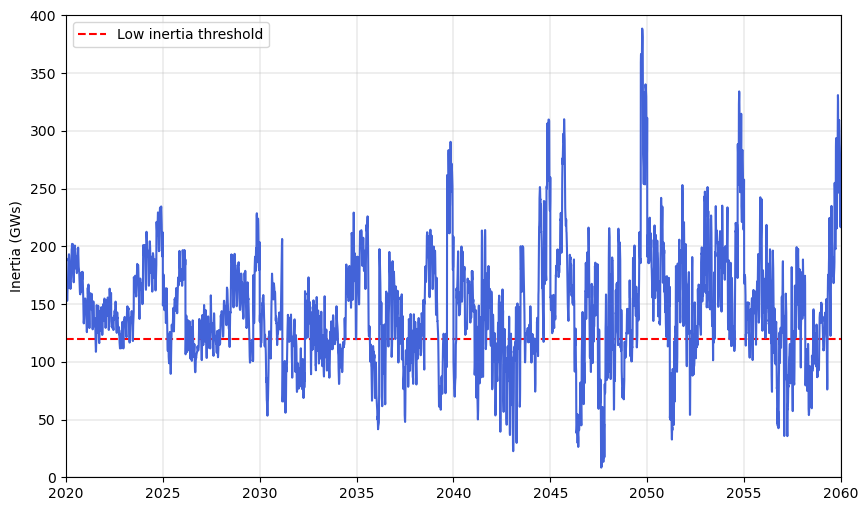

In [14]:
def calc_rot_mass_GWs(df_row):
    rot_mass_MWs = 0
    for tech, inertia_const in INERTIA_BY_TECH.items():
        rot_mass_MWs += df_row[tech] * inertia_const
    return rot_mass_MWs / 1000

print("Rotational mass in Nordic system 2020-2060 (hourly resolution)")

df_rotm["Rotational mass GWs"] = df_rotm.apply(lambda row: calc_rot_mass_GWs(row), axis=1)

rot_mass_GW_by_hour = list(df_rotm.groupby(by=["Period", "Hour"])["Rotational mass GWs"].sum())
hours = [i+1 for i in range(len(rot_mass_GW_by_hour))]

fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

# Should be above 120 GWs (from master thesis ^)
plt.axhline(y=120, color='r', linestyle='--')

plt.plot(hours, rot_mass_GW_by_hour, color="#4363d8")
plt.ylabel("Inertia (GWs)")
plt.margins(x=0)
plt.ylim(0, 400)


# Change ticks (720 hrs per year)
plt.xticks(ticks=[720*i for i in range(9)], labels=[2020+5*i for i in range(9)])
plt.legend(["Low inertia threshold"], handlelength=2, loc="upper left")
plt.savefig(f"SavedFigs/RotationalMass/Nordic-RotationalMass", bbox_inches='tight')
plt.show()